<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
url = 'https://www.nrc.gov/reading-rm/doc-collections/event-status/reactor-status/powerreactorstatusforlast365days.txt'
import requests
response = requests.get(url)
data = response.text
text_file = open("data.txt", "w")
n = text_file.write(data)
text_file.close()

In [2]:
import pandas as pd
data = pd.read_csv("data.txt", sep='|')
data.ReportDt = pd.to_datetime(data.ReportDt)
data.set_index("ReportDt", inplace = True)

In [3]:
data.Power.describe()

count    35341.000000
mean        88.924337
std         29.817210
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: Power, dtype: float64

In [4]:
# statistics
TotalNum = len(data.Power)
FullNum = len(data.Power[data.Power == 100])
ZeroNum = len(data.Power[data.Power == 0])
EightyNum = len(data.Power[(data.Power < 100) & (data.Power >= 80)])
FullPer = FullNum / TotalNum
ZeroPer = ZeroNum / TotalNum
EightyPer = EightyNum / TotalNum
print("Full Power Operation Reactor-days Percentage:",FullPer)
print("Power (80%-100%) Operation Reactor-days Percentage:",EightyPer)
print("Shutdown reactor-days Percentage:",ZeroPer)
print("Sum of the above:", FullPer + EightyPer + ZeroPer)

Full Power Operation Reactor-days Percentage: 0.8028635296114994
Power (80%-100%) Operation Reactor-days Percentage: 0.08160493477830282
Shutdown reactor-days Percentage: 0.09416824651254917
Sum of the above: 0.9786367109023514


Text(0, 0.5, 'Power level')

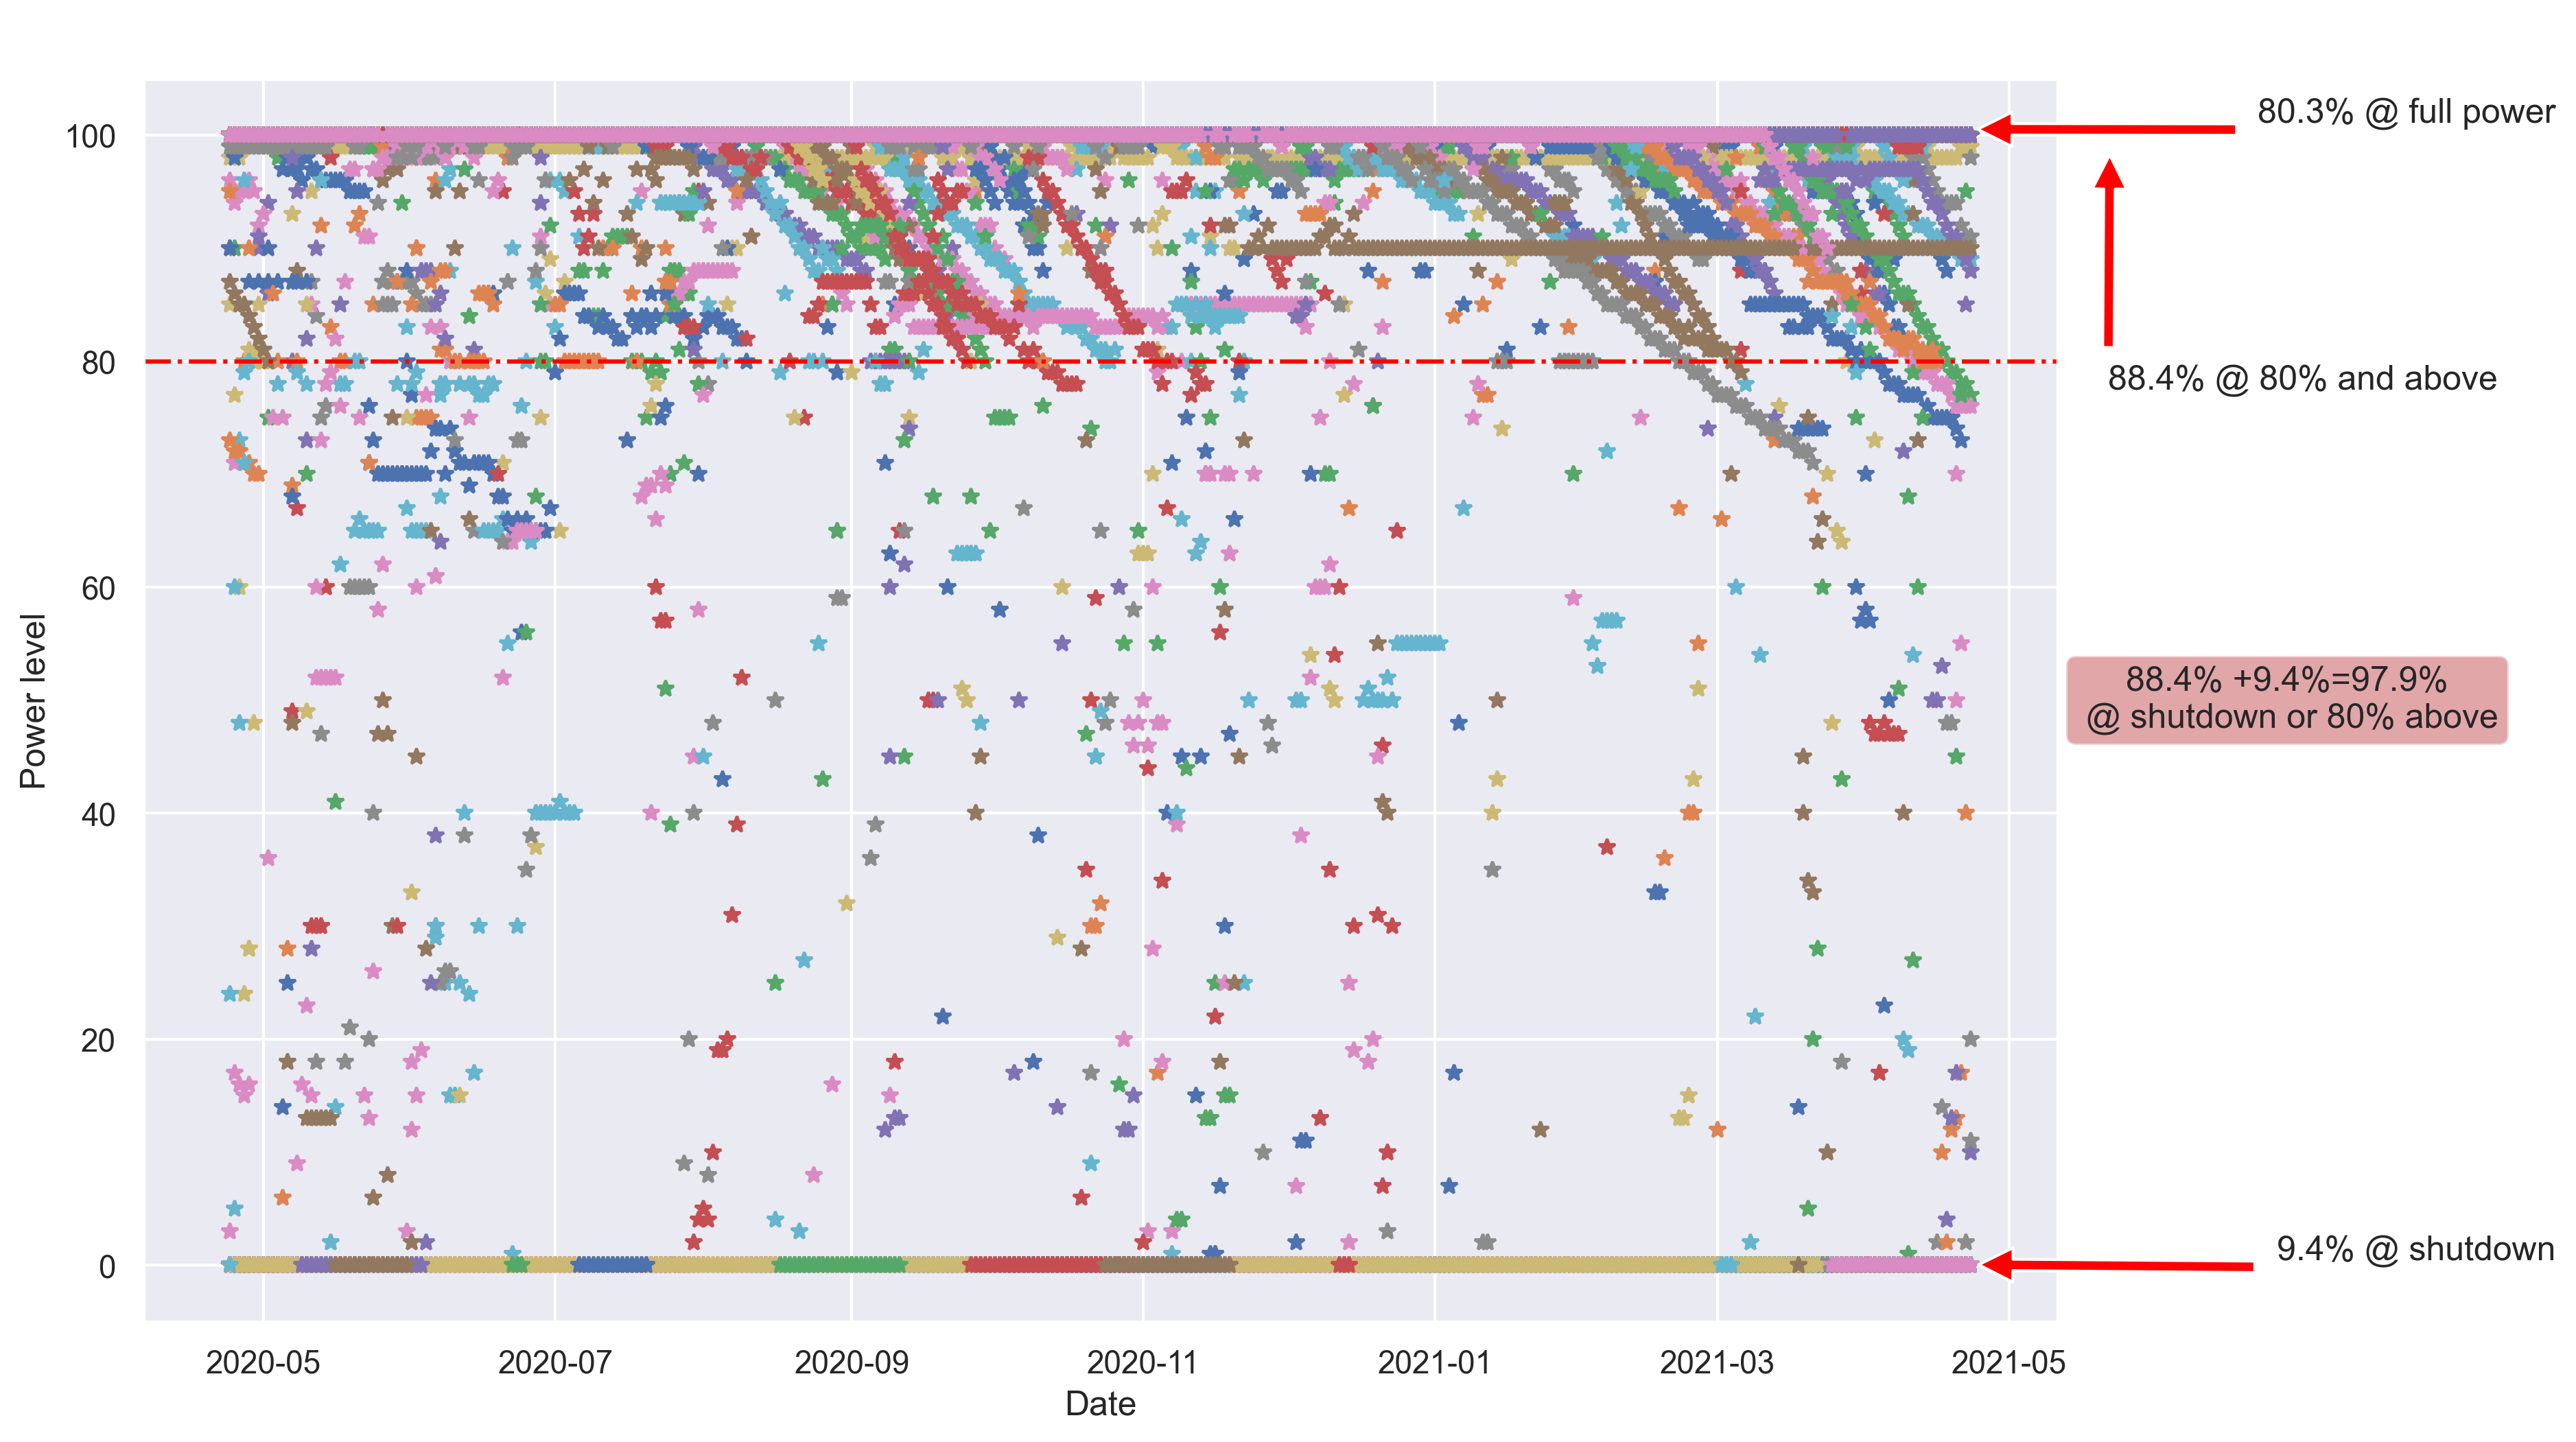

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme(style="darkgrid")

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots()

for key, grp in data.groupby(['Unit']): 
    ax.plot(grp.Power, "*")
    #sns.lineplot(grp.index, grp.Power)
    
ax.annotate("%.1f"%(FullPer*100)+'% @ full power', xy=(0.762, 0.91),  xycoords='figure fraction',
            xytext=(1.26, 0.985), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
            
ax.annotate("%.1f"%(ZeroPer*100)+'% @ shutdown', xy=(0.762, 0.123),  xycoords='figure fraction',
            xytext=(1.26, 0.07), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
            
# 3
ax.annotate("%.1f"%(FullPer*100 + EightyPer*100)+'% @ 80% and above', xy=(0.819, 0.9),  xycoords='figure fraction',
            xytext=(1.23, .77), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
props = dict(boxstyle='round', facecolor='r', alpha=0.5)            
ax.text(1.12, 0.5,"%.1f"%(FullPer*100 + EightyPer*100)+'% +' + "%.1f"%(ZeroPer*100)+'%='  +   "%.1f"%(FullPer*100 + EightyPer*100 + ZeroPer*100) + '%\n @ shutdown or 80% above',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
     bbox=props)
     
     
#ax.text(1.3, 0.5,"%.1f"%(FullPer*100 + EightyPer*100)+'% +' + "%.1f"%(ZeroPer*100)+'%='+ "%.1f"%(FullPer*100 + EightyPer*100 + ZeroPer*100)'+'% +' @ 80% and above',

     
plt.axhline(y=80, color="red", linestyle="-.")           
plt.xlabel("Date")
plt.ylabel('Power level')
#plt.savefig("NPPstatus.png", dpi=300)
    